# Linear Regression


### Step 1: Import Necessary Libraries

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error 

### Step 2: Generate Dataset

In [2]:
# Generate synthetic data: hours studied vs exam score
np.random.seed(0)  # For reproducibility
hours_studied = np.random.rand(100, 1) * 10  # Random values in a 10-hour range
exam_scores = 2 * hours_studied + np.random.randn(100, 1) * 2  # Linear relationship with noise

# Convert to a DataFrame for easier handling
data = pd.DataFrame({'Hours Studied': hours_studied.flatten(), 'Exam Score': exam_scores.flatten()})

### Step 3: Visualize Data

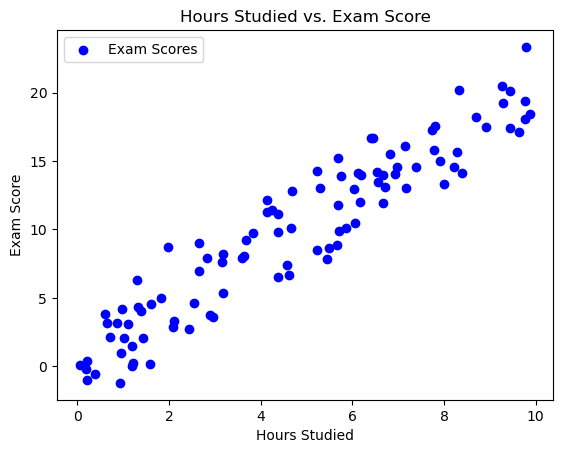

In [3]:
plt.scatter(data['Hours Studied'], data['Exam Score'], color='blue', label='Exam Scores')
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

### Step 4: Prepare Data

In [5]:
# Split the dataset
X = data[['Hours Studied']]
y = data['Exam Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Create and Train Model

In [7]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model


LinearRegression()

### Step 6: Model Evaluation

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 1.60
R-squared: 0.85


### Step 7: Make Predictions

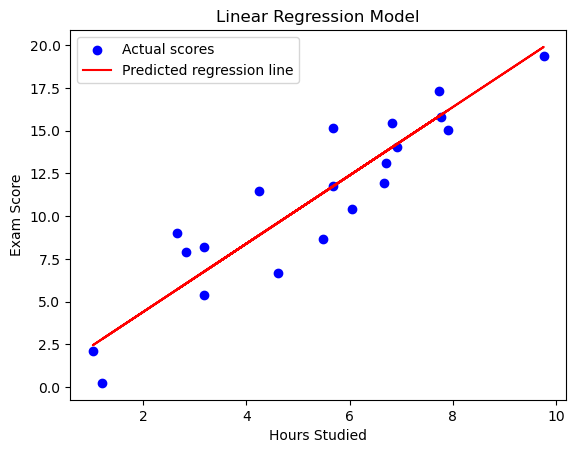

In [9]:
# Visualization of the model predictions
plt.scatter(X_test, y_test, color='blue', label='Actual scores')
plt.plot(X_test, y_pred, color='red', label='Predicted regression line')
plt.title('Linear Regression Model')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# findings are:

The predicted regression line for relation of hours studied and Exam score is shown by red line. The blue dots above the line indicates the exam score that outperformed the model prediction and the dots below are the ones which underperformed model prediction.
MAE shows the prediction errors and R squared error indicates the model fitting in the data. R squared value is 0.8 which is a good fit. Mean absolute error is 1.60 which is small error value.

The distance of each blue dot to the red line indicates the prediction error of the model.

### Implementing linear Regression Model on a different dataset



In [47]:
df = pd.read_csv('housing.csv')

In [48]:
df.head()

,Neighborhood,Building.Classification,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value,Market.Value.per.SqFt,Boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan


In [49]:
df.shape

(2626, 13)

In [50]:
df.columns

Index(['Neighborhood', 'Building.Classification', 'Total.Units', 'Year.Built',
       'Gross.SqFt', 'Estimated.Gross.Income', 'Gross.Income.per.SqFt',
       'Estimated.Expense', 'Expense.per.SqFt', 'Net.Operating.Income',
       'Full.Market.Value', 'Market.Value.per.SqFt', 'Boro'],
      dtype='object')

In [51]:
df.dtypes

Neighborhood                object
Building.Classification     object
Total.Units                  int64
Year.Built                 float64
Gross.SqFt                   int64
Estimated.Gross.Income       int64
Gross.Income.per.SqFt      float64
Estimated.Expense            int64
Expense.per.SqFt           float64
Net.Operating.Income         int64
Full.Market.Value            int64
Market.Value.per.SqFt      float64
Boro                        object
dtype: object

Assumuing to find relationship between Gross.SqFt and Estimated.Expense of each housing

In [54]:
df[['Gross.SqFt', 'Estimated.Expense']].isnull().sum()

Gross.SqFt           0
Estimated.Expense    0
dtype: int64

## Data visualisation

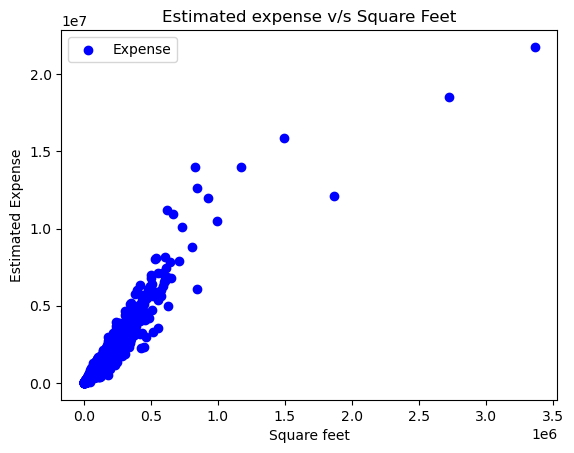

In [78]:
plt.scatter(df['Gross.SqFt'], df['Estimated.Expense'], color='blue', label='Expense')
plt.title('Estimated expense v/s Square Feet')
plt.xlabel('Square feet')
plt.ylabel('Estimated Expense')
plt.legend()
plt.show()

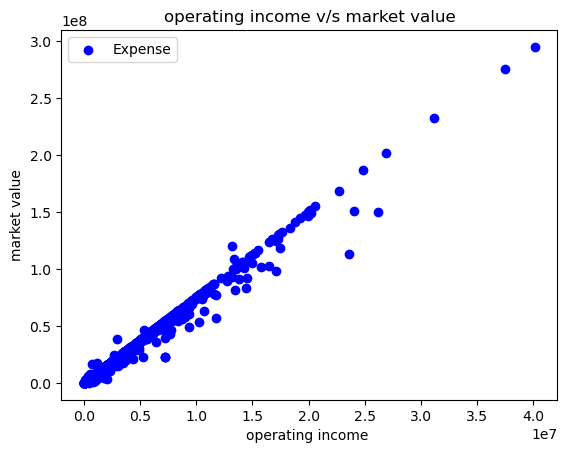

In [93]:
plt.scatter(df['Net.Operating.Income'], df['Full.Market.Value'], color='blue', label='Expense')
plt.title('operating income v/s market value')
plt.xlabel('operating income ')
plt.ylabel('market value')
plt.legend()
plt.show()

here we can see that the market value increases with the increase in operational income. It shows a linear relationship

I am choosing the net operating income v/s full markeet value for further analysis, since its disribution is better for linear analysis

In [100]:
# allocating the values of Net.Operating.Income to x and Full.Market.Value to y
x = df['Net.Operating.Income']
y = df['Full.Market.Value']

In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
## making xtrain 2D array since model.fit expects 2D array

xtrain = xtrain.values.reshape(-1, 1)
model = LinearRegression()
model.fit(xtrain, ytrain) 

LinearRegression()

In [103]:
# making xtest 2D array since model.predict expects 2D array
xtest = xtest.values.reshape(-1, 1)

ypred = model.predict(xtest)

In [104]:
# doing evaluation
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
mae = mean_absolute_error(ytest, ypred)


In [105]:
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

print('R-squared:', r2)

Mean Squared Error: 4315540747373.3154
Mean Absolute Error: 708414.5579562046
R-squared: 0.9922549302161856


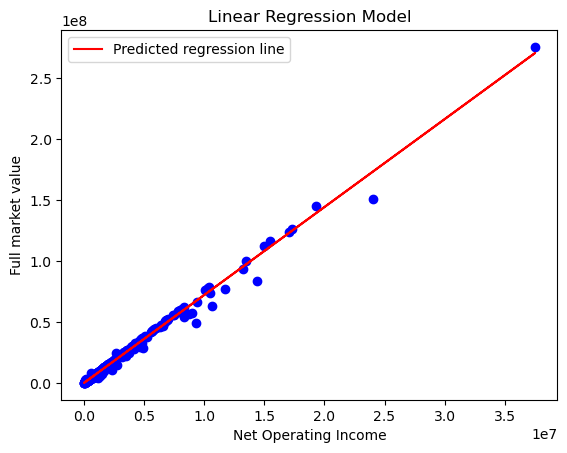

In [106]:
# Visualization of the model predictions
plt.scatter(xtest, ytest, color='blue')
plt.plot(xtest, ypred, color='red', label='Predicted regression line')
plt.title('Linear Regression Model')
plt.xlabel('Net Operating Income')
plt.ylabel('Full market value')
plt.legend()
plt.show()

We can see the points above and below the prediction line shows the one that doesnot fit to the model

### Explaination of implementation


The chosen dataset is housing.csv dataset. I tried to analyse the relationship of net operating income  to the full market value of houses.
In the visualisation graph provided it is visible we have a linear relationship between the  operating income and full market value. As the net income increases the market value also increases. Thus we can choose a linear regression model for analysing the data.
We can see that the market value increases with the increase in operational income. It is a linear relationship
We can see points are almost evenly distributed throughout.

We split the data into train and test data. 80 percent of data is taken for training and 20 percentage for testing.

MSE and MAE shows the prediction errors and R squared error indicates how well the model fits in the data.
R-squared value is 0.99 which shows a very good fit.
The MSE and MAE values are large shows the mean value of errors respectively.

The dataset is cleaned and the relevant columns are split into xtrain, xtest,ytrain,ytest. 
xtest and xtrain is reshaped to make it a 2D array to fit into model.fit and model.predit function.

The model evaluation is done using mean squared error, mean absolute error and Rsquared error methods.
The data visualisation with regression mode is done , we can see the datapoints that are above and below the predicted line, which indicates the overfitted and underfitted points.